In [2]:
# Package Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [3]:
# Load all Datasets
train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
test = pd.read_csv('../input/home-credit-default-risk/application_test.csv')
bureau = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau.csv')
bureau_balance = pd.read_csv('../input/home-credit-default-risk/bureau_balance.csv')
POS_CASH_balance = pd.read_csv('../input/home-credit-default-risk/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('../input/home-credit-default-risk/credit_card_balance.csv')
previous_application = pd.read_csv('../input/home-credit-default-risk/previous_application.csv')
installments_payments = pd.read_csv('../input/home-credit-default-risk/installments_payments.csv')

# Shape of each set (rows,columns)
print(f'Size of Test {train.shape}')
print(f'Size of Train {test.shape}')
print(f'Size of bureau {bureau.shape}')
print(f'Size of bureau_balance {bureau_balance.shape}')
print(f'Size of POS_CASH_balance {POS_CASH_balance.shape}')
print(f'Size of credit_card_balance {credit_card_balance.shape}')
print(f'Size of previous_application {previous_application.shape}')
print(f'Size of installments_payments {installments_payments.shape}')

Size of Test (307511, 122)
Size of Train (48744, 121)
Size of bureau (1716428, 17)
Size of bureau_balance (27299925, 3)
Size of POS_CASH_balance (10001358, 8)
Size of credit_card_balance (3840312, 23)
Size of previous_application (1670214, 37)
Size of installments_payments (13605401, 8)


In [4]:
# Train Dataset
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Test Dataset
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Target Distribution
0    282686
1     24825
Name: TARGET, dtype: int64



<AxesSubplot:xlabel='TARGET', ylabel='count'>

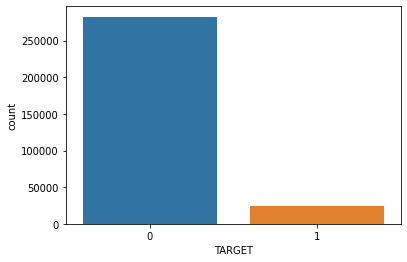

In [6]:
# Target Distribution
# 0 = repaid loan 1= default on loan
print("Target Distribution")
print(train['TARGET'].value_counts())
print("")
sns.countplot(x='TARGET', data=train)

In [7]:
# Missing Values
mis_val = train.isnull().sum()
mis_val_percent = 100*train.isnull().sum()/len(train)
mis_val_table = pd.concat([mis_val, mis_val_percent],axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns={0:'Missing Values',1:'% of Missing Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Missing Values',ascending=False).round(1)
mis_val_table_ren_columns.head(10)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [8]:
# Correlations
corr = train.corr()['TARGET'].sort_values()

print('Top Postive Correlations:\n', corr.tail(15))
print('\nTop Negative Correlations:\n', corr.head(15))

Top Postive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Top Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REG

In [9]:
# Bureau Dataset
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [10]:
# Bureau_Balance Dataset
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64


<AxesSubplot:>

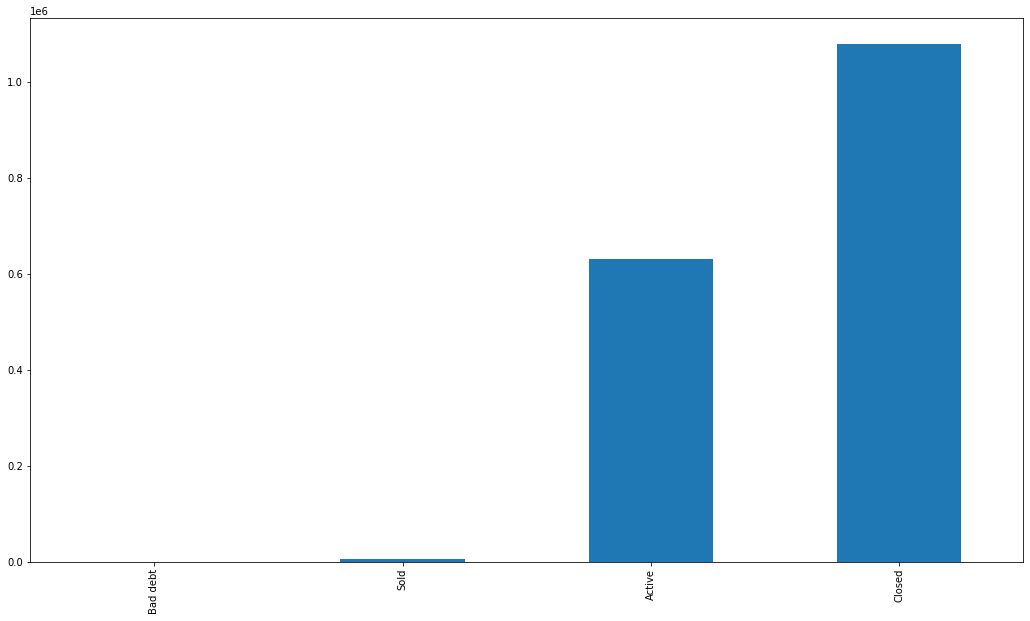

In [11]:
## Bureau Dataset

# Closed vs Active vs Sold vs Bad Debt Accounts
print(bureau.CREDIT_ACTIVE.value_counts())
bureau.CREDIT_ACTIVE.value_counts().sort_values().plot(kind = 'bar', figsize=(17.8,10))

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64


<AxesSubplot:>

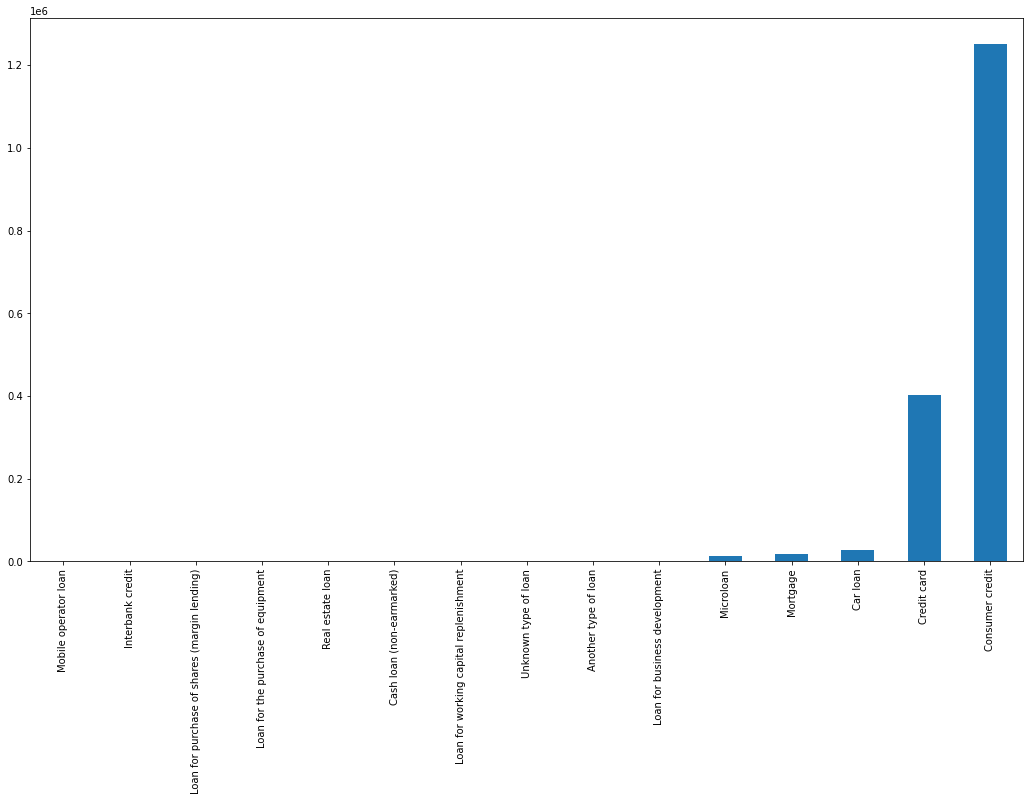

In [12]:
## Bureau Dataset

# Credit Types
print(bureau.CREDIT_TYPE.value_counts())
bureau.CREDIT_TYPE.value_counts().sort_values().plot(kind = 'bar', figsize=(17.8,10))

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64


<AxesSubplot:>

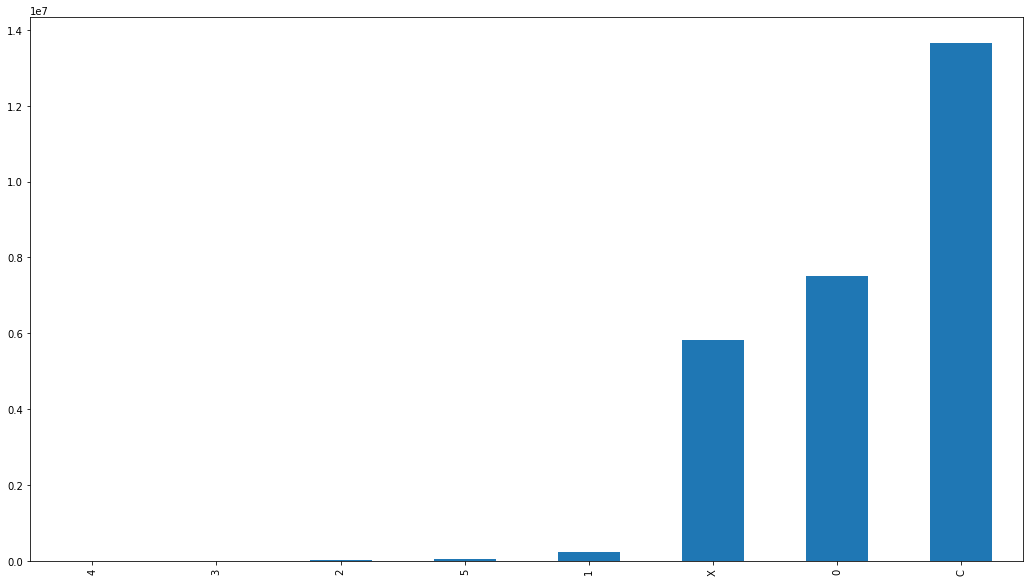

In [13]:
## Bureau_Balance Dataset

# Account Status (C=Closed, X=Unknown, 0/1/2/3/4/5=How Many Months Past Due)
print(bureau_balance.STATUS.value_counts())
bureau_balance.STATUS.value_counts().sort_values().plot(kind = 'bar', figsize=(17.8,10))

In [14]:
# POS_CASH_balance Dataset
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Missing data Percentage
CNT_INSTALMENT                0.26
CNT_INSTALMENT_FUTURE         0.26

   CNT_INSTALMENT  CNT_INSTALMENT_FUTURE
0            48.0                   45.0
1            36.0                   35.0
2            12.0                    9.0
3            48.0                   42.0
4            36.0                   35.0
5            12.0                   12.0
6            48.0                   43.0
7            36.0                   36.0
8            12.0                   12.0
9            24.0                   16.0



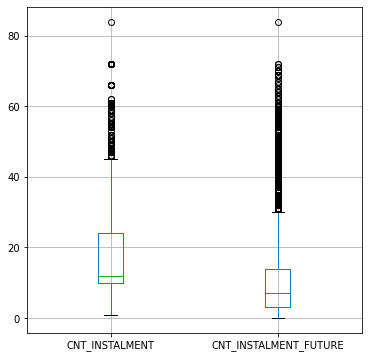

In [15]:
# Exploring CNT_INSTALMENT/CNT_INSTALMENT_FUTURE
df_PosCash_missing =POS_CASH_balance.isna()
df_PosCash_missing = df_PosCash_missing.sum(axis=0)
df_PosCash_Miss_prec=(df_PosCash_missing / len(POS_CASH_balance))*100

print('Missing data Percentage')
for i,v in df_PosCash_Miss_prec.items():
    if v > 0:
         print(f'{i:<30}{round(v,2):>2}')

print("")
            
df_PosCash_miss_Col= pd.DataFrame()

for i in POS_CASH_balance:
    if POS_CASH_balance[i].isna().sum(axis=0) >0:
        df_PosCash_miss_Col[i] = POS_CASH_balance[i]
print(df_PosCash_miss_Col.head(10))

data = df_PosCash_miss_Col.sample(frac=.1, random_state=1, ignore_index=True)

print("")
# df_PosCash_miss_Col=df_PosCash_miss_Col.dropna()
boxplot = data.boxplot(figsize=(6,6),column=['CNT_INSTALMENT','CNT_INSTALMENT_FUTURE']) 

Missing data Percentage
AMT_DRAWINGS_ATM_CURRENT      19.52
AMT_DRAWINGS_OTHER_CURRENT    19.52
AMT_DRAWINGS_POS_CURRENT      19.52
AMT_INST_MIN_REGULARITY       7.95
AMT_PAYMENT_CURRENT           20.0
CNT_DRAWINGS_ATM_CURRENT      19.52
CNT_DRAWINGS_OTHER_CURRENT    19.52
CNT_DRAWINGS_POS_CURRENT      19.52
CNT_INSTALMENT_MATURE_CUM     7.95
   AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                         0.0   
1                    2250.0                         0.0   
2                       0.0                         0.0   
3                    2250.0                         0.0   
4                       0.0                         0.0   

   AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
0                     877.5                 1700.325               1800.0   
1                       0.0                 2250.000               2250.0   
2                       0.0                 2250.000               22

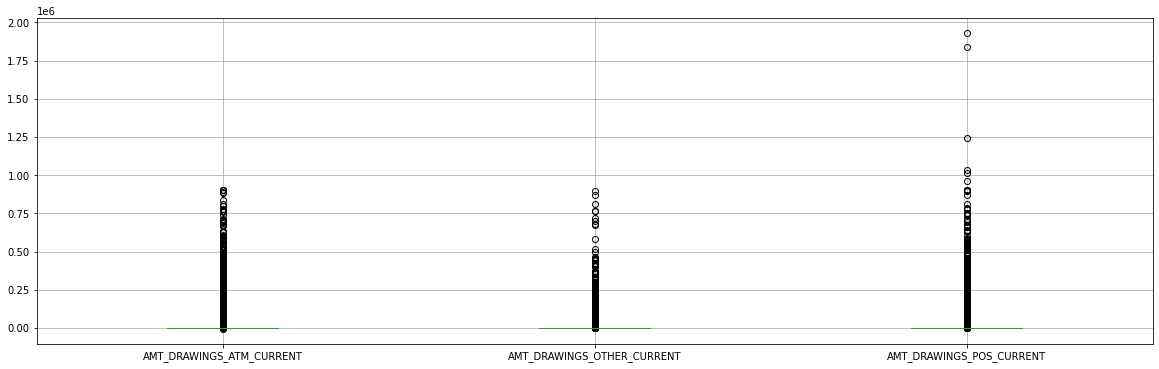

In [16]:
## Credit_Card_Balance Dataset

# Exploring AMT_DRAWINGS_ATM_CURRENT/AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT

CredCdBal_missing =credit_card_balance.isna()
CredCdBal_missing = CredCdBal_missing.sum(axis=0)
CredCdBal_Miss_prec=(CredCdBal_missing / len(credit_card_balance))*100

print('Missing data Percentage')
for i,v in CredCdBal_Miss_prec.items():
    if v > 0:
         print(f'{i:<30}{round(v,2):>2}')


df_CredCdBal_miss_Col= pd.DataFrame()

for i in credit_card_balance:
    if credit_card_balance[i].isna().sum(axis=0) >0:
        df_CredCdBal_miss_Col[i] = credit_card_balance[i]
print(df_CredCdBal_miss_Col.head())
        
data = df_CredCdBal_miss_Col.sample(frac=.1, random_state=1, ignore_index=True)

print("")
# df_CredCdBal_miss_Col=df_CredCdBal_miss_Col.dropna()
boxplot = data.boxplot(figsize=(20,6),column=['AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT']) 